In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
# This is for displaying Chinese characters if your system supports it. If not, it's okay.
plt.rcParams['font.sans-serif'] = ['SimHei']  # SimHei is a common Chinese font
plt.rcParams['axes.unicode_minus'] = False  # To display the minus sign correctly

# --- Load the feature data we created ---
# Define the file path
BASE_DIR = os.getcwd() # Gets the current directory of the notebook
FEATURES_FILE = os.path.join(BASE_DIR, 'features_technical.csv')

# Load the data, parsing the 'Date' column as dates
df = pd.read_csv(FEATURES_FILE, parse_dates=['Date'])

print("Data loaded successfully!")
print(f"The dataset contains {df['ticker'].nunique()} unique stocks.")
df.head()

Data loaded successfully!
The dataset contains 101 unique stocks.


,Date,ticker,Close,High,Low,Open,Volume,SMA_20,EMA_50,RSI_14,...,BBL_20_2.0_2.0,BBM_20_2.0_2.0,BBU_20_2.0_2.0,BBB_20_2.0_2.0,BBP_20_2.0_2.0,ATRr_14,volatility_20d,returns_1d,returns_3d,returns_5d
0,2000-03-14,AAPL,0.857449,0.932500,0.855573,0.909750,428579200.0,0.892049,0.830715,44.220538,...,0.804480,0.892049,0.979618,19.633222,0.302443,0.055030,0.043784,-0.058218,-0.065440,-0.070194
1,2000-03-15,AAPL,0.872459,0.902480,0.856511,0.867769,443609600.0,0.891017,0.832352,46.192471,...,0.803015,0.891017,0.979019,19.753220,0.394561,0.054382,0.044001,0.017506,-0.075547,-0.047132
2,2000-03-16,AAPL,0.912330,0.915614,0.859325,0.880434,378100800.0,0.893808,0.835489,51.134154,...,0.806879,0.893808,0.980736,19.451276,0.606535,0.054519,0.043464,0.045699,0.002061,-0.005624
3,2000-03-17,AAPL,0.938128,0.938128,0.897789,0.901542,305043200.0,0.897607,0.839514,54.073344,...,0.809868,0.897607,0.985347,19.549625,0.730917,0.053506,0.043870,0.028278,0.094092,-0.005965
4,2000-03-20,AAPL,0.923118,0.947510,0.918428,0.926872,204489600.0,0.902016,0.842792,52.109507,...,0.818791,0.902016,0.985242,18.453172,0.626776,0.051761,0.041613,-0.016000,0.058065,0.013910


In [2]:
# We will select 'AAPL' as our example for visualization
ticker_df = df[df['ticker'] == 'AAPL'].copy()

# To make the plot clearer, let's focus on the data from the year 2001
ticker_df = ticker_df[(ticker_df['Date'] >= '2001-01-01') & (ticker_df['Date'] <= '2001-12-31')]

# Set the 'Date' column as the index, which is useful for time-series plotting
ticker_df.set_index('Date', inplace=True)

print(f"Filtered for 'AAPL' data in 2001. Total records: {len(ticker_df)}.")

Filtered for 'AAPL' data in 2001. Total records: 248.


In [3]:
# ===================================================================
# 修正后的代码：先加载数据，再计算指标
# ===================================================================

# 1. 导入需要的库
import pandas as pd
import pandas_ta as ta

# 2. 加载数据并创建 ticker_df
#    !!! 这是最关键的一步，请根据您的实际情况修改 !!!
try:
    # --- 用户需要修改的部分 ---
    # 请将 'features_technical.csv' 替换为您的实际数据文件名。
    # 从您左侧的文件列表看，'features_technical.csv' 可能是正确的文件。
    file_path = 'features_technical.csv'  # <--- 如果文件名不同，请在这里修改！
    
    # 从CSV文件加载数据
    df = pd.read_csv(file_path)
    
    # --- 数据预处理 ---
    # 确保日期列 'Date' 是日期格式，并设为索引 (这对时间序列分析很重要)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # pandas-ta库默认使用小写的'close'列，如果您的列名是'Close'，我们将其重命名
    if 'Close' in df.columns and 'close' not in df.columns:
        df.rename(columns={'Close': 'close'}, inplace=True)

    # 在这里，我们将整个加载的数据作为 ticker_df。
    # 如果您需要筛选特定股票（如'AAPL'），可以取消下面这行的注释并修改
    # df = df[df['Ticker'] == 'AAPL'] 
    
    ticker_df = df.copy() # 使用 .copy() 是一个好习惯，避免警告
    
    print(f"成功从 '{file_path}' 加载数据并创建了 'ticker_df'。")
    print("数据预览 (前5行):")
    print(ticker_df.head())

except FileNotFoundError:
    print(f"错误：找不到文件 '{file_path}'！请确认文件名和路径是否正确。")
    # 创建一个空的DataFrame，以防后续单元格因变量不存在而报错
    ticker_df = pd.DataFrame()

# 3. 检查并计算技术指标 (这部分是您原有的代码)
if not ticker_df.empty:
    # 检查 ticker_df 中是否已有技术指标, 避免重复计算
    if 'BBU_20_2.0' not in ticker_df.columns:
        print("\n未找到技术指标列，现在开始计算...")

        # 使用 pandas-ta 为 ticker_df 添加布林带指标
        # Length=20, std=2.0, 这会生成 'BBU_20_2.0', 'BBM_20_2.0', 'BBL_20_2.0' 等列
        ticker_df.ta.bbands(length=20, std=2.0, append=True)

        # 使用 pandas-ta 为 ticker_df 添加 RSI 指标
        # Length=14, 这会生成 'RSI_14' 列
        ticker_df.ta.rsi(length=14, append=True)

        print("\n成功添加布林带 (Bollinger Bands) 和 RSI 指标。")
        print("\n'ticker_df' 中新的列名:")
        print(ticker_df.columns)
    else:
        print("\n技术指标列已存在，无需重复计算。")

    # 显示 DataFrame 的最后几行, 以确认新列已添加且有数据
    print("\n显示包含新指标的 DataFrame 最后几行:")
    print(ticker_df.tail())
else:
    print("\n'ticker_df' 为空，跳过了技术指标计算。请检查数据加载步骤。")

成功从 'features_technical.csv' 加载数据并创建了 'ticker_df'。
数据预览 (前5行):
           ticker     close      High       Low      Open       Volume  \
Date                                                                     
2000-03-14   AAPL  0.857449  0.932500  0.855573  0.909750  428579200.0   
2000-03-15   AAPL  0.872459  0.902480  0.856511  0.867769  443609600.0   
2000-03-16   AAPL  0.912330  0.915614  0.859325  0.880434  378100800.0   
2000-03-17   AAPL  0.938128  0.938128  0.897789  0.901542  305043200.0   
2000-03-20   AAPL  0.923118  0.947510  0.918428  0.926872  204489600.0   

              SMA_20    EMA_50     RSI_14  MACD_12_26_9  ...  BBL_20_2.0_2.0  \
Date                                                     ...                   
2000-03-14  0.892049  0.830715  44.220538      0.024275  ...        0.804480   
2000-03-15  0.891017  0.832352  46.192471      0.020033  ...        0.803015   
2000-03-16  0.893808  0.835489  51.134154      0.019662  ...        0.806879   
2000-03-17  0.8976

成功筛选出股票 'AAPL' 的数据，正在生成图表...


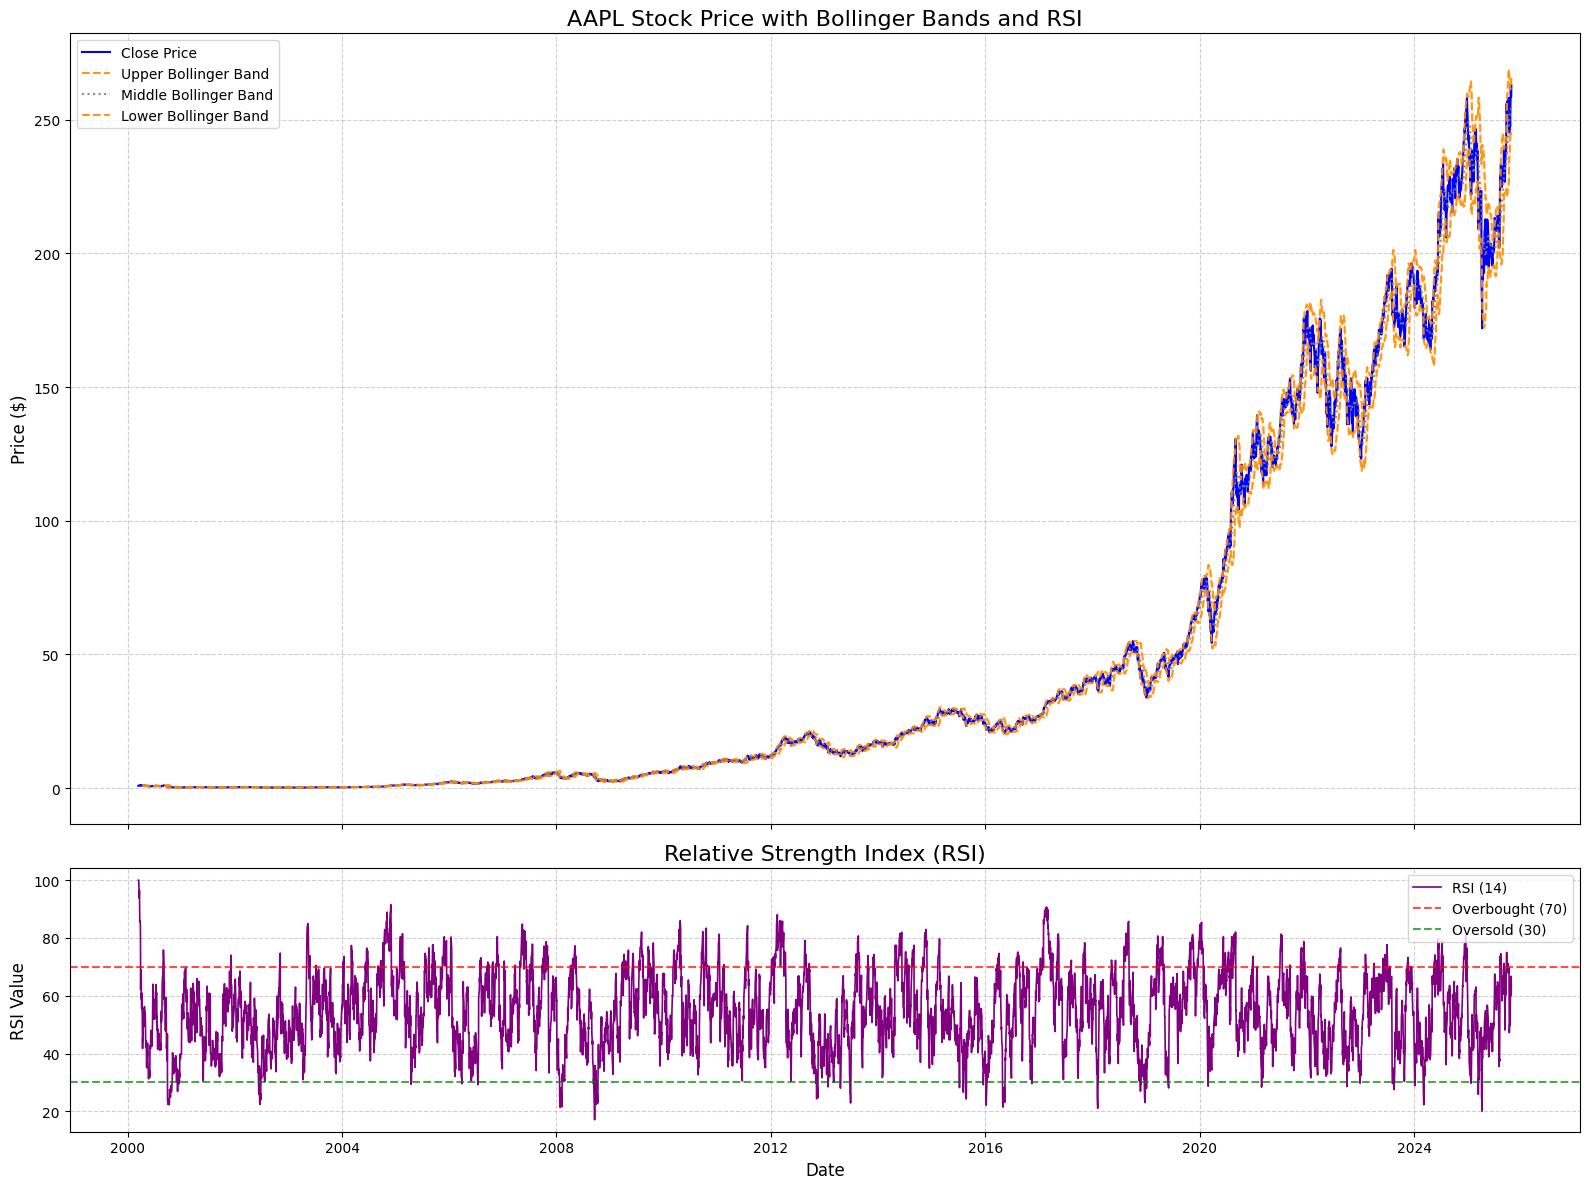

In [11]:
# ===================================================================
# 最终解决方案 v3：使用正确的列名进行绘图
# ===================================================================

import matplotlib.pyplot as plt

# 检查 ticker_df 是否存在且包含必要的数据
if 'ticker_df' in locals() and not ticker_df.empty and 'ticker' in ticker_df.columns:
    
    # --- 关键步骤：从所有股票中选择一只进行分析 ---
    TICKER_TO_PLOT = 'AAPL' # 您可以保持 'AAPL' 或换成其他股票代码

    # 从主DataFrame中筛选出指定股票的数据，并使用 .copy() 避免SettingWithCopyWarning
    single_stock_df = ticker_df[ticker_df['ticker'] == TICKER_TO_PLOT].copy()

    # 检查筛选后的DataFrame是否为空
    if single_stock_df.empty:
        print(f"错误：找不到股票代码为 '{TICKER_TO_PLOT}' 的数据。")
        print(f"请确保您输入的代码正确，并且它存在于您的数据集中。")
        print(f"可用的股票代码有: {ticker_df['ticker'].unique()}")
    else:
        print(f"成功筛选出股票 '{TICKER_TO_PLOT}' 的数据，正在生成图表...")
        
        # --- 使用筛选后的 single_stock_df 进行绘图 ---
        # 创建图表和子图
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

        # --- 子图 1: 价格与布林带 ---
        ax1.plot(single_stock_df.index, single_stock_df['close'], label='Close Price', color='blue', linewidth=1.5)

        # --- 修正：使用您数据中实际存在的正确列名 ---
        ax1.plot(single_stock_df.index, single_stock_df['BBU_20_2.0_2.0'], label='Upper Bollinger Band', color='darkorange', linestyle='--', alpha=0.9)
        ax1.plot(single_stock_df.index, single_stock_df['BBM_20_2.0_2.0'], label='Middle Bollinger Band', color='grey', linestyle=':', alpha=0.9)
        ax1.plot(single_stock_df.index, single_stock_df['BBL_20_2.0_2.0'], label='Lower Bollinger Band', color='darkorange', linestyle='--', alpha=0.9)
        ax1.fill_between(single_stock_df.index, single_stock_df['BBL_20_2.0_2.0'], single_stock_df['BBU_20_2.0_2.0'], color='orange', alpha=0.15)

        ax1.set_title(f'{TICKER_TO_PLOT} Stock Price with Bollinger Bands and RSI', fontsize=16)
        ax1.set_ylabel('Price ($)', fontsize=12)
        ax1.legend()
        ax1.grid(True, linestyle='--', alpha=0.6)

        # --- 子图 2: RSI ---
        ax2.plot(single_stock_df.index, single_stock_df['RSI_14'], label='RSI (14)', color='purple', linewidth=1.2)
        ax2.axhline(70, linestyle='--', color='red', alpha=0.7, label='Overbought (70)')
        ax2.axhline(30, linestyle='--', color='green', alpha=0.7, label='Oversold (30)')

        ax2.set_title('Relative Strength Index (RSI)', fontsize=16)
        ax2.set_ylabel('RSI Value', fontsize=12)
        ax2.set_xlabel('Date', fontsize=12)
        ax2.legend()
        ax2.grid(True, linestyle='--', alpha=0.6)

        plt.tight_layout()
        plt.show()

else:
    print("错误：无法继续。请确保变量 'ticker_df' 已被正确创建，非空，并且包含一个名为 'ticker' 的列。")

成功读取特征数据。


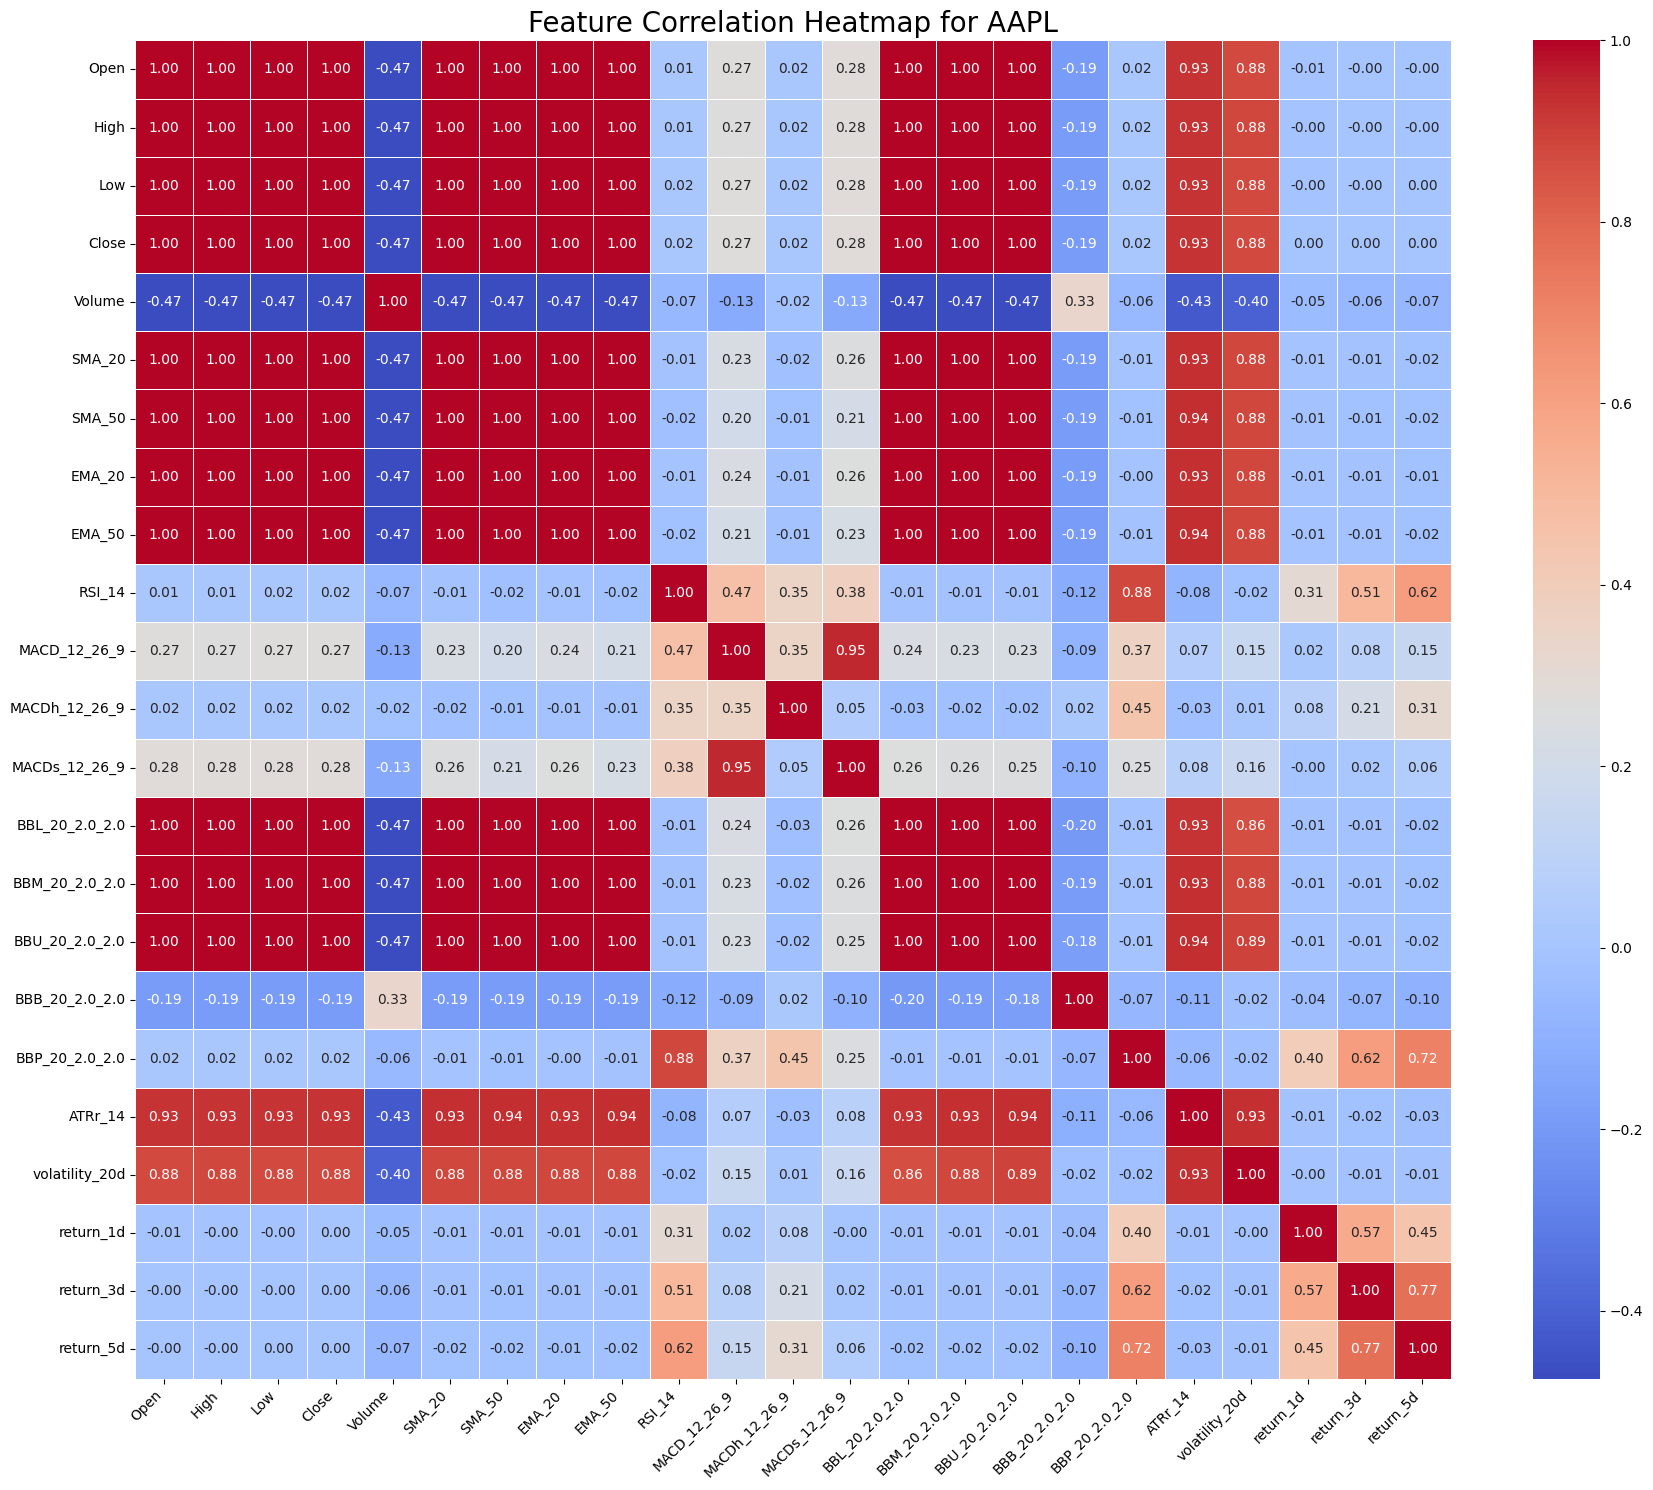

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 尝试读取已经保存好的特征数据
try:
    features_df = pd.read_csv('data/features_technical.csv', index_col='Date', parse_dates=True)
    print("成功读取特征数据。")
except FileNotFoundError:
    print("错误: 找不到 'data/features_technical.csv' 文件。请检查路径。")
    features_df = None

# 只有在 DataFrame 成功加载后才继续执行
if features_df is not None:
    
    # 2. 选择一个股票进行分析 (例如 'AAPL')
    TICKER_TO_ANALYZE = 'AAPL'
    
    # 3. 过滤出该股票的所有特征数据
    #    修改: 将 'ticker' 改为 'Ticker' 以匹配实际的列名
    single_stock_features = features_df[features_df['Ticker'] == TICKER_TO_ANALYZE]

    # 3.1 移除不参与相关性分析的列，比如 'Ticker' 这个非数值列
    #     修改: 将 'ticker' 改为 'Ticker'
    columns_to_correlate = single_stock_features.drop(columns=['Ticker'])

    # 4. 计算特征间的相关性矩阵
    correlation_matrix = columns_to_correlate.corr()

    # 5. 使用 Seaborn 绘制热力图
    plt.style.use('default') 
    plt.figure(figsize=(18, 15))

    sns.heatmap(
        correlation_matrix,
        annot=True,         # 在格子上显示数值
        cmap='coolwarm',    # 选择一个冷暖色调的颜色映射
        fmt='.2f',          # 格式化数值，保留两位小数
        linewidths=.5       # 在格子之间添加细线
    )

    plt.title(f'Feature Correlation Heatmap for {TICKER_TO_ANALYZE}', fontsize=20)
    plt.xticks(rotation=45, ha='right') 
    plt.yticks(rotation=0)
    plt.tight_layout() 
    plt.show()